# Franchir les frontières académiques : analyse des flux de mobilité des étudiants entrant dans l'enseignement supérieur

Ce projet a été réalisé dans le cadre du cours de 2ème année de l'ENSAE "Python pour la data science" par Mathieu CAMBON, Charlotte HIECQUE et Elise MENSCH. 

## Sommaire
1. [Introduction](#intro)
2. [Préparation des données](#donnees)
3. [Statistiques descriptives](#statsdesc)
    - [Disparités géographiques](#geo)
    - [Excellence](#excellence)
    - [Sélectivité](#selectivite)
    - [Clivage public/privé](#public_prive)
    - [Genre](#genre)

4. [Modélisation](#modelisation)
5. [Conclusion](#conclu)

<a id="intro"></a>
## Introduction

### Contexte
La plateforme Parcoursup affecte chaque année des milliers d'étudiants à une formation. Les formations sont nombreuses, et même si certaines ont le même objectif, chacune possède une identité propre pouvant inciter un étudiant à postuler à une formation plutôt qu'une autre, engendrant ainsi une certaine mobilité des étudiants. Pourtant, cette mobilité peut être contrainte par de nombreux facteurs. De plus, elle est inégalement répartie sur le territoire, avec certaines villes qui attirent un grand nombre de personnes tandis que d'autres engendrent une fuite des étudiants, qui se dirigent vers d'autres académies dans le cadre de leurs études supérieures. Il apparaît donc intéressant d'étudier la mobilité des étudiants lors de leur entrée en étude supérieure. Analyse de Parcoursup comme moteur de mobilité territoriale au lieu de l'orientation; 

### Problématique 
Quels sont les facteurs qui encouragent une mobilité lors de l'entrée dans l'éducation supérieure ? 

De manière plus précise, nous allons analyser les mécanismes suivants : 
- La géographie des flux : quels sont les académies qui attirent les étudiants et celles qui, au contraire les repoussent ?
- La mobilité comme une stratégie pour accéder aux formations d'excellence;
- L'offre de formation, notamment la sélectivité et le statut.

### Données
Pour effectuer cette analyse, nous avons principalement utilisé les données parcoursup en opendata sur data.gouv. A partir de cette base que nous avons nettoyé, nous avons créé de nouvelles données afin d'enrichir notre analyse. 

### Plan

<a id="donnees"></a>## Importation des bases de données et nettoyage

### Importation des librairies nécessaires

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Nettoyage et enrichissement de la base de données

In [40]:
%load_ext autoreload
%autoreload 2

from function import charger_donnees, decrire_donnees

url_parcoursup2024 = "https://www.data.gouv.fr/api/1/datasets/r/1d916b7c-bd4c-4951-845a-70f7ad7c17db"

df=charger_donnees(url_parcoursup2024)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Chargement du fichier...
Succès 14079 lignes prêtes


<a id="statdescr"></a>
## Statistiques descriptives

<a id="geo"></a>
### Analyse géographique : quels sont les pôles d'attractivité ?

Commençons par des analyses descriptives concernant la répartition des formations par région

In [52]:
#Nombre d'établissements par région

print("Répartition de l'offre par réfion")

#On ne garde que le top 10 pour faciliter la lisibilité
top_regions = df["region"].value_counts().head(10)
display(top_regions.to_frame("Nombre d'établissements"))

Répartition de l'offre par réfion


,Nombre d'établissements
region,
Ile-de-France,2612
Auvergne-Rhône-Alpes,1722
Hauts-de-France,1282
Occitanie,1202
Grand-Est,1159
Nouvelle Aquitaine,1156
Provence-Alpes-Côte d'Azur,955
Pays-de-la-Loire,820
Bretagne,758


/tmp/ipykernel_3871/1545860952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


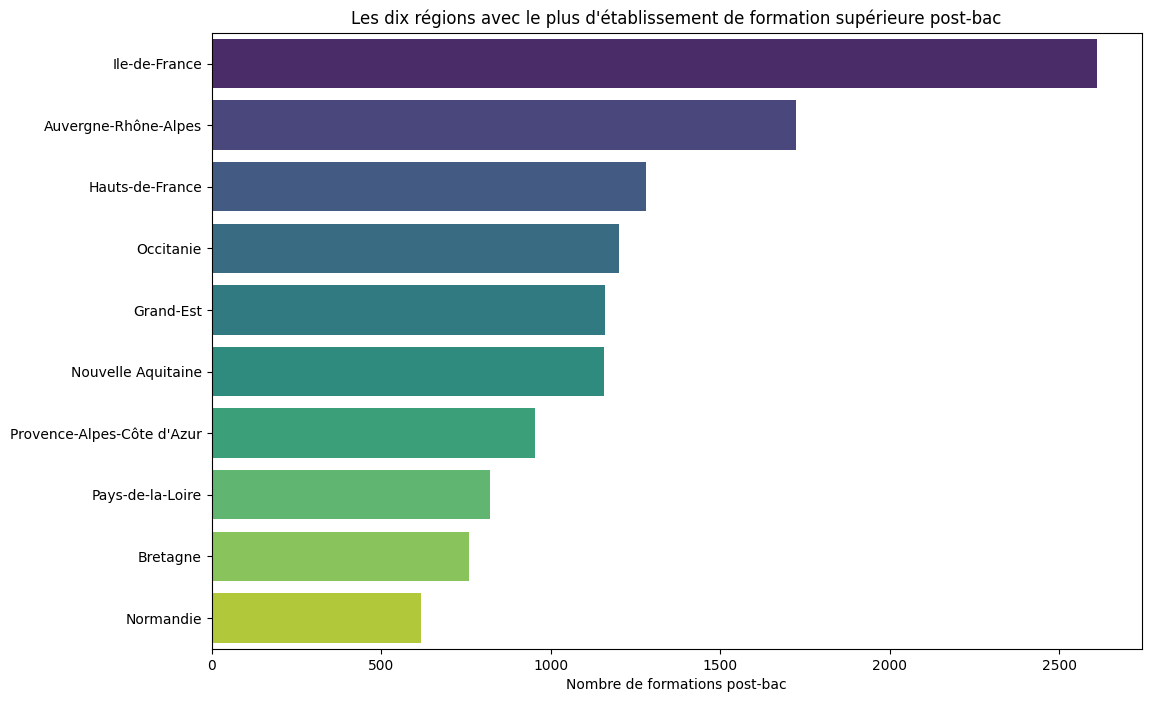

In [53]:
plt.figure(figsize=(12,8))

compt_region = df["region"].value_counts().head(10)

sns.barplot(
    x = compt_region.values,
    y = compt_region.index,
    palette="viridis"
)

plt.title("Les dix régions avec le plus d'établissement de formation supérieure post-bac")
plt.xlabel("Nombre de formations post-bac")
plt.ylabel("")
plt.show()

Ce tableau et ce graphique montrent des inégalités importantes dans la répartition de l'offre sur le territoire. En effet, l'Ile-de-France concentre une grande part de l'offre nationale, ce qui en fait naturellement une région attractive pour les étudiants qui cherchent des formations particulières qui ne se trouvent que dans des académies franciliennes. 
De plus, la région Auvergne-Rhône-Alpes se détachent également des autres régions, portées par de grandes métropoles étudiantes comme Lyon ou Grenoble. Les autres régions semblent un peu plus homogènes. 
Ainsi cette concentration de formation hétérogène selon les régions suggère que la mobilité peut être structurelle, influencée par la nécessité de changer d'académie pour avoir accès à telle ou telle formation. 

In [54]:
print("Pourcentage d'étudiants locaux par région")

stats_geo = decrire_donnees(df, "region", "part_bac_ac_pcv")
display(stats_geo)

Pourcentage d'étudiants locaux par région


,nombre,Q1,médiane,Q3,moyenne
region,,,,,
Auvergne-Rhône-Alpes,1722,49.0,69.0,86.0,64.2
Occitanie,1202,50.0,71.0,86.0,65.8
Nouvelle Aquitaine,1156,50.0,71.0,86.0,65.0
Pays-de-la-Loire,820,52.0,75.0,88.0,67.8
Bourgogne-Franche-Comté,588,50.0,77.0,92.0,68.4
Bretagne,758,58.2,81.0,95.0,72.6
Provence-Alpes-Côte d'Azur,955,64.5,82.0,92.0,74.3
Grand-Est,1159,62.0,83.0,95.0,74.3
Centre,442,66.2,83.0,93.0,74.5


Contrairement à ce qu'on pourrait croire, ce n'est pas l'Ile-de-France mais l'Auvergne-Rhône-Alpe qui est la région la plus ouverte, c'est à dire dont les établissements recrutent le plus en dehors de leur académie. Cela peut s'expliquer par la présence de pôles universitaires importants : Lyon, Grenoble, Clermont-Ferrand qui peuvent s'échanger des étudiants et leur attractivité auprès des académies voisines. 
Avec une médiane de 88% de locaux, l'Ile de France apparaît comme très sédentaire : la majorité des étudiants dans des formations franciliennes sont des franciliens. Cela peut s'expliquer par la taille du vivier de recrutement en Ile-de-France qui laisse statistiquement moins de places aux provinciaux. 
Enfin, en bas du tableau, on retrouve les régions insulaires, qui ont mécaniquement un taux d'entrant assez faible. 

Pour avoir plus de précision, nous observons les flux entre académies, qui sont les seules données auxquelles nous avons accès en terme de flux. 

Pour éviter des biais pouvant être lié à des caractéristiques propres à l'Ile-de-France, notamment des flux entre les différents départements, nous créons une nouvelle variable qui regroupe les académies de Paris, Créteil et Versailles. 

In [44]:
# Regroupement de Paris, Créteil et Versailles
df["academie_pcv"] = df["academie"].replace(
    ["Paris", "Créteil", "Versailles"], "Paris-Créteil-Versailles"
)

On calcule ensuite différents indicateurs. 
En regroupant par académie, on calcule le pourcentage de locaux en moyenne.

In [45]:
academies = df.groupby("academie_pcv")["part_bac_ac_pcv"].mean().reset_index()

In [46]:
display(academies.style.background_gradient(cmap="viridis", subset=["part_bac_ac_pcv"]))

,academie_pcv,part_bac_ac_pcv
0,Aix-Marseille,75.592282
1,Amiens,75.747634
2,Besancon,70.237154
3,Bordeaux,70.990369
4,Clermont-Ferrand,61.942857
5,Corse,77.081081
6,Dijon,67.071642
7,Etranger,44.294118
8,Grenoble,73.972835
9,Guadeloupe,89.676923


Passons maintenant à la visualisation graphique.

/tmp/ipykernel_3871/597566750.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


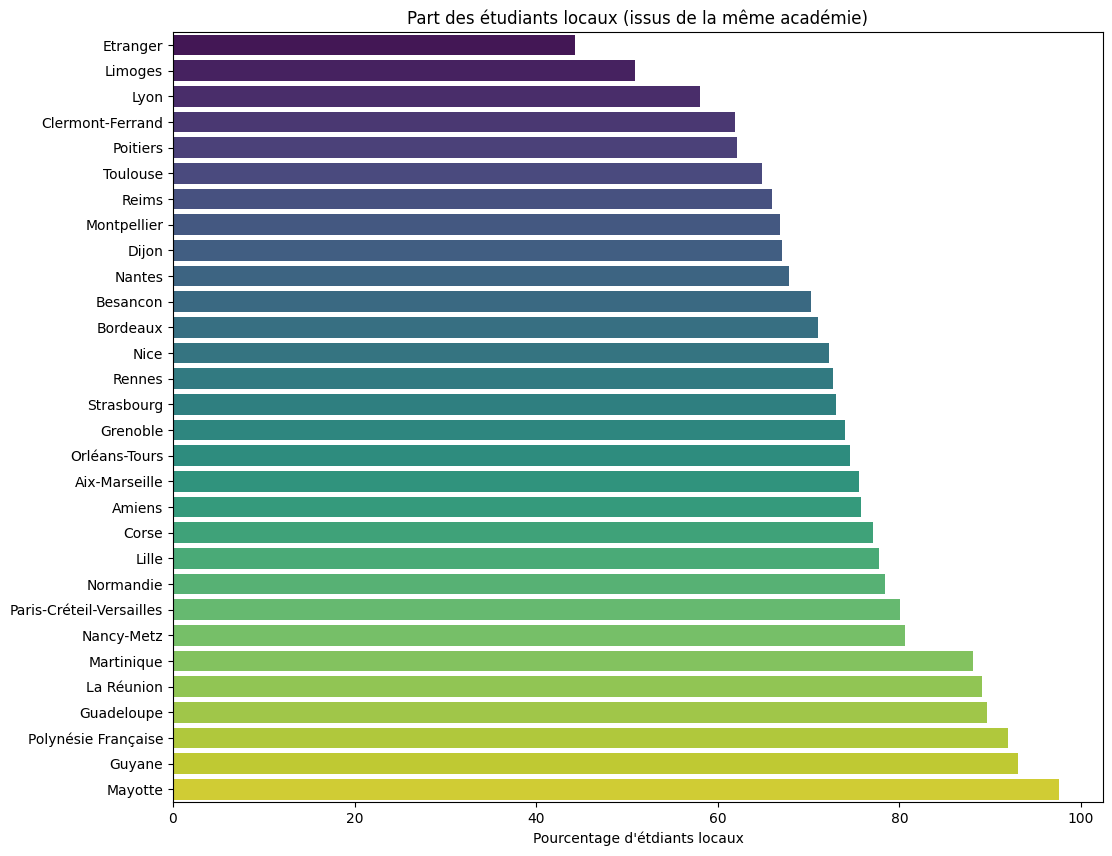

In [47]:
academies = academies.sort_values(by = "part_bac_ac_pcv", ascending=True)

plt.figure(figsize=(12,10))
sns.barplot(
    data=academies,
    x="part_bac_ac_pcv",
    y="academie_pcv",
    palette="viridis",
)

plt.title("Part des étudiants locaux (issus de la même académie)")
plt.xlabel("Pourcentage d'étdiants locaux")
plt.ylabel("")
plt.show()

On calcule cette fois-ci le taux d'entrant.

In [48]:
academies["taux_entrants"] = 100 - academies["part_bac_ac_pcv"]

#tri pour connaître les académies les plus attractives
academies=academies.sort_values(by="taux_entrants", ascending=True)

/tmp/ipykernel_3871/3091903523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


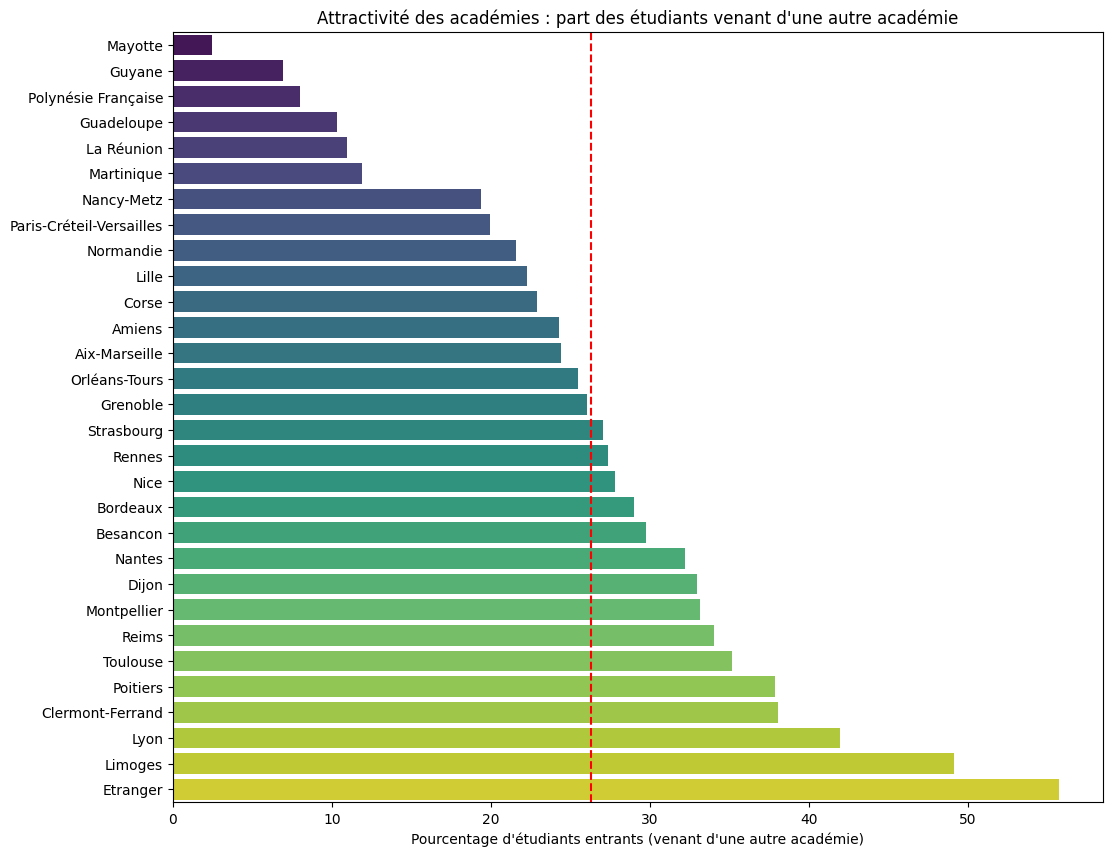

In [49]:
plt.figure(figsize=(12,10))
sns.barplot(
    data=academies,
    x="taux_entrants",
    y="academie_pcv",
    palette="viridis"
)

plt.title("Attractivité des académies : part des étudiants venant d'une autre académie")
plt.xlabel("Pourcentage d'étudiants entrants (venant d'une autre académie)")
plt.ylabel("")

moyenne_nationale = academies["taux_entrants"].mean()
plt.axvline(x=moyenne_nationale, color="red", linestyle="--", label = f"Moyenne nationale ({moyenne_nationale:.1f}%)")

Ces deux graphiques, qui sont complémentaires (de façon logique), montre des disparités géographiques concernant la mobilité des étudiants selon les régions. 

On peut s'intéresser tout d'abord à l'Ile-de-France, souvent considérée comme un espace attractif pour les étudiants, en raison du nombre de formations. On observe ici un pourcentage assez faible de 20% d'entrants, fortement inférieur à la moyenne nationale d'environ 26%. Cela pourrait indiquer une sorte d'autosuffisance du bassin parisien. Ainsi, les franciliens restent dans leurs académies grâce à la grande diversité et densité des formations. Cependant ce chiffre peut masquer une importante mobilité interne entre ces trois académies. => *ça pourrait peut valoir le coup de l'étudier un peu plus en détail ?*

En mettant de côté l'étranger qui est un cas vraiment à part, on remarque que trois des quatre académies avec le plus d'étudiants non locaux, Limoges, Clermont-Ferrand, Poitiers sont situés au centre de la France, dans des environnements démographiques peu dynamiques et sont des capitales régionales un peu isolées graphiquement. Ainsi, elles doivent nécessairement recruter en dehors de leurs académies pour maintenir leurs formations et peuvent ainsi bénéficier la saturation d'autres métropoles. De part leur histoire, ce sont des académies avec une grande diversité de formations. *Ce sont peut être aussi des endroits avec un nombre plus important de formations, par exemple que Amiens ?*
Dans ce groupe, Lyon fait figure d'exception. On peut supposer que cette métropole est particulièrement attractive, notamment pour les étudiants des grandes villes voisines. 

Le cas des outre-mers quant à lui est assez prévisible. En effet, étant marginalisés géographiquement, il s'ensuit que leur recrutement est particulièrement local. 

Enfin, les villes proches de la moyenne nationale, Nantes, Bordeaux, Rennes cumulent un nombre important de bacheliers ainsi qu'une offre de formation dynamique. Ainsi, il existe une mobilité choisie des étudiants. *Regarder le nombre de bacheliers par académie voir si ça colle ?*

Ainsi, la mobilité n'est pas uniforme sur l'ensemble du territoire. Elle semble dépendre principalement de la tension entre l'offre de formation et la démographie locale. *A enquêter plus en détail ?*

Pour en savoir plus sur le lien entre l'offre de formation et la mobilité dans les académies, nous rechercher une corrélation entre la taille de l'académie (du point de vue du nombre d'étudiants qu'elle recrute chaque année) et la proportion d'étudiants locaux. 

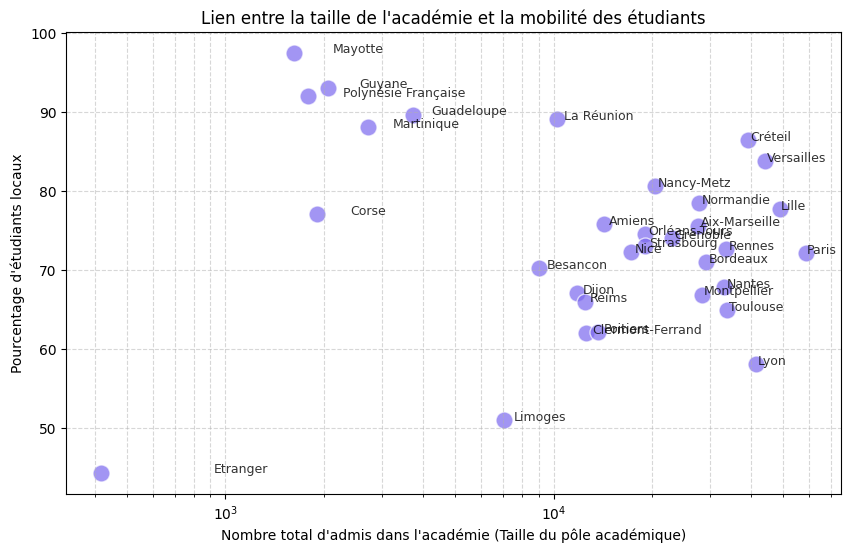

In [50]:
# Corrélation entre démographie mobilité

# Agglomération des données par académie
acad_stats = df.groupby("academie").agg({
    "nb_admis": "sum",             # Taille de l'académie (Nombre total d'étudiants)
    "part_bac_ac_pcv": "mean"      # Taux moyen de locaux
}).reset_index()

# Visualisation
plt.figure(figsize=(10, 6))

# Nuage de points
sns.scatterplot(
    data=acad_stats,
    x="nb_admis",
    y="part_bac_ac_pcv",
    s=150, 
    color="mediumslateblue",
    alpha=0.7
)

# Ajoute des noms des académies
for i in range(acad_stats.shape[0]):
    plt.text(
        x=acad_stats.nb_admis[i]+500, 
        y=acad_stats.part_bac_ac_pcv[i], 
        s=acad_stats.academie[i], 
        fontdict=dict(color='black', size=9),
        alpha=0.8
    )

plt.title("Lien entre la taille de l'académie et la mobilité des étudiants")
plt.xlabel("Nombre total d'admis dans l'académie (Taille du pôle académique)")
plt.ylabel("Pourcentage d'étudiants locaux")
plt.xscale("log") # Échelle log car Paris/Lille sont énormes par rapport à la Corse
plt.grid(True, which="both", linestyle="--", alpha=0.5)

plt.show()

Ce graphique permet de croiser la taille de l'académie (en nombre d'admis) en abscisse et son taux de recrutement local en ordonnée. La relation qui en résulte n'est pas linéaire, incitant à réfuter l'idée que plus une académie est grande, plus elle recrute localement. 

On observe en effet une courbe en U, permettant de dégager trois profils :

A gauche, on observe des académies de petite taille, avec un fort pourcentage d'étudiants locaux, qui s'explique principalement par leur insularité géographique. 

Au centre, on observe des académies de taille moyenne avec une ouverture importante, par exemple Limoges, Clermont-Ferrand, Reims... Ici, la cause semble être structurelle : historiquement elles ont une offre de formation et sont obligées de recruter à l'extérieur pour la remplir. 

Enfin, à partir d'un certain nombre d'admis, la courbe remonte, semblant montrer que ces académies s'autosuffisent. Ce sont particulièrement des métropoles. 

<a id="excellence"></a>
### Excellence scolaire: qui sont les élèves mobiles ?

On pourrait s'intéresser à l'effet de "brain drain" ou fuite des cerveaux, qui pourrait encourage les meilleurs élèves à quitter leur académie pour accéder aux filières les plus prestigieuses. 



Avant d'analyser les données par des graphiques, nous commençons par quelques statistiques descriptives concernant les filières et leur niveau afin de nous permettre de mieux appréhender le jeu de données.

In [ ]:
print("Statistiques descriptives sur le volume des formations dans le jeu de données")
vol = df["filiere_agr"].value_counts().to_frame("Nombre d'établissements")
display(vol)


--- Statistiques descriptives sur le volume des formations dans le jeu de données---


,Nombre d'établissements
filiere_agr,
BTS,5345
Licence,3019
Autre formation,1605
CPGE,982
BUT,819
Ecole d'Ingénieur,523
Licence_Las,522
IFSI,518
PASS,284


/tmp/ipykernel_3871/2311375223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=compt.values, y=compt.index, palette="viridis")


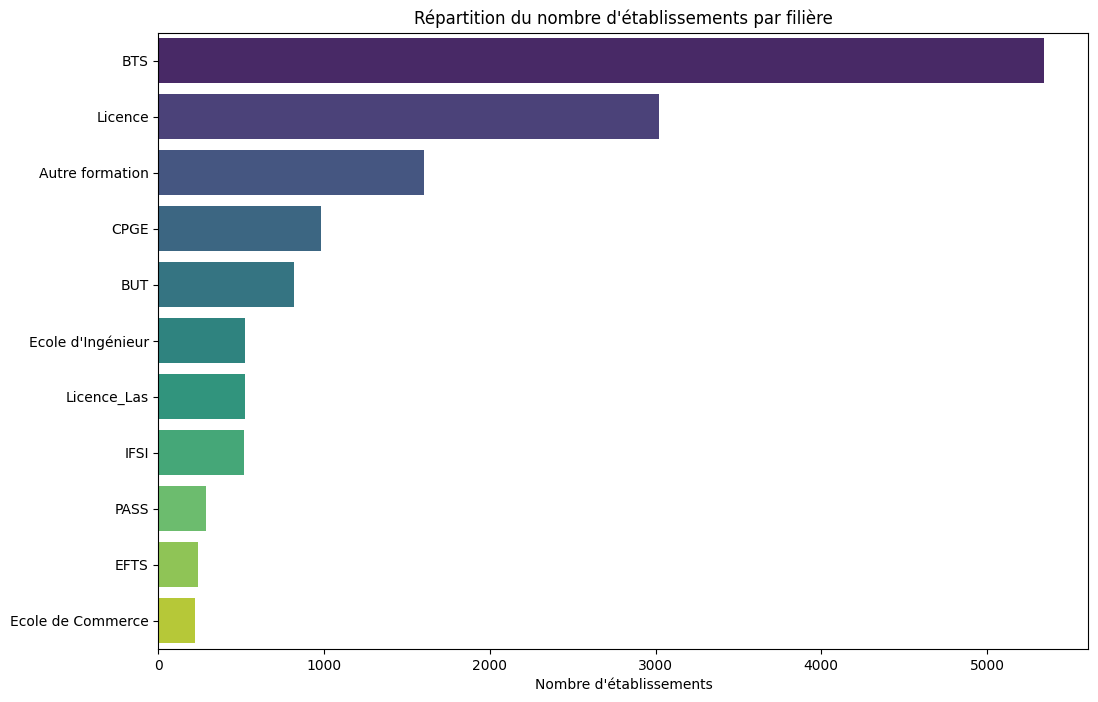

In [37]:
#Barplot permettant de voir visuellement le nombre d'établissements
plt.figure(figsize=(12,8))

compt = df["filiere_agr"].value_counts()

sns.barplot(x=compt.values, y=compt.index, palette="viridis")

plt.title("Répartition du nombre d'établissements par filière")
plt.xlabel("Nombre d'établissements")
plt.ylabel("")
plt.show()

En regardant le volume de chaque formation, on observe une structure assez pyramidale. En effet, il existe une prédominance des formations courtes. 

Avec 5345 formations, les BTS représentent la majeure partie de l'offre. Ce volume important peut s'expliquer par le maillage territorial très fin de ce type de formation.

Les filières universitaires (Licence, BUT, PASS, LAS et IFSI) représentent le deuxième bloc, principalement situé dans des pôles universitaires, dans des métropoles.

Enfin, les filières sélectives sont beaucoup plus rares.

Ainsi, le poids important des BTS risque d'avoir une influence importante sur nos résultats. Ainsi une analyse par filière apparaît pertinente pour faire la part des choses. 

In [ ]:
print("Niveau des admis selon la formation (pourcentage de mentions très bien)")

stats_niveau = decrire_donnees(df, "filiere_agr", "tb_eleves")
display(stats_niveau)

--- Niveau des admis selon la formation (pourcentage de mentions très bien) ---


,nombre,Q1,médiane,Q3,moyenne
filiere_agr,,,,,
Autre formation,1507,0.0,0.0,16.7,12.7
BTS,5304,0.0,0.0,5.3,3.5
EFTS,226,0.0,0.0,7.9,5.1
Ecole de Commerce,219,0.0,1.1,5.4,4.5
BUT,818,0.0,3.0,5.9,4.5
Licence_Las,517,0.0,3.6,11.1,8.3
Licence,2975,0.0,4.5,11.8,10.4
IFSI,516,1.6,4.5,8.3,7.3
Ecole d'Ingénieur,468,0.0,8.3,22.3,16.5


L'analyse du niveau scolaire des formations suggère une segmentation de l'enseignement supérieur. En effet, des filières comme les CPGE ou la PASS concentrent l'excellence scolaire. Les classes préparatoires dominent largement avec une moyenne de 33,3% de mention très bien et un troisième quartile tel que dans les meilleures prépas, un élèves sur deux a une mention très bien au bac. 
A l'inverse, des formations plus professionnalisante, comme le BTS, ont des élèves avec un niveau académique moindre. La médiane à 0 montre qu'avoir une mention très bien au bac lorsqu'on intègre un BTS est relativement rare.
L'université et les écoles post-bac occupent une position intermédiaire. 

In [43]:
print("Sélectivité des filières (taux d'accès en pourcentage)")

stats_selectivite = decrire_donnees(df, "filiere_agr", "taux_acces_clean")

display(stats_selectivite)

Sélectivité des filières (taux d'accès en pourcentage)


,nombre,Q1,médiane,Q3,moyenne
filiere_agr,,,,,
PASS,284,23.0,35.5,49.0,39.8
IFSI,517,24.0,38.0,51.0,37.8
EFTS,237,34.0,45.0,58.0,46.8
Autre formation,1538,20.0,47.0,76.0,48.6
BUT,819,30.0,50.0,72.0,50.6
Licence_Las,522,34.2,59.0,89.8,59.6
Ecole de Commerce,221,43.0,62.0,74.0,58.4
BTS,5337,40.0,62.0,83.0,60.6
CPGE,982,34.0,62.5,84.0,58.8


On remarque que les deux principales filières en tension sont les filières de santé : la médecine (PASS) et les écoles d'infimier.e (IFSI). Cela crée une tension entre l'offre et la demande et cette rareté pourrait encourager la mobilité. Toutefois pour la PASS, cette mobilité est structurellement limitée par des règles de priorité géographique (sectorisation), qui favorise les étudiants locaux . 
Un résultat étonnant est celui des CPGE qui aurait pu, de prime abord, apparaître comme une filière très sélective. Or avec une médiane de 62,5, les classes préparatoires apparaissent plus accessibles que les BUT. Cependant, on observe un écart important entre le premier quartile et le troisième quartile suggère une dualité entre de petites prépas de province avec un taux d'accès important et des grandes prépas prestigieuses de métropoles avec un taux d'accès réduit. 
Enfin, de manière cohérent, les licences apparaissent comme des filières très ouvertes. 

Pour visualiser cela, nous croisons le type de filière avec niveau d'excellence de la formation, qui est calculé à partir de la part d'étudiant ayant eu une mention très bien au bac. 

/tmp/ipykernel_3871/1989462573.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_excellence = df.pivot_table(


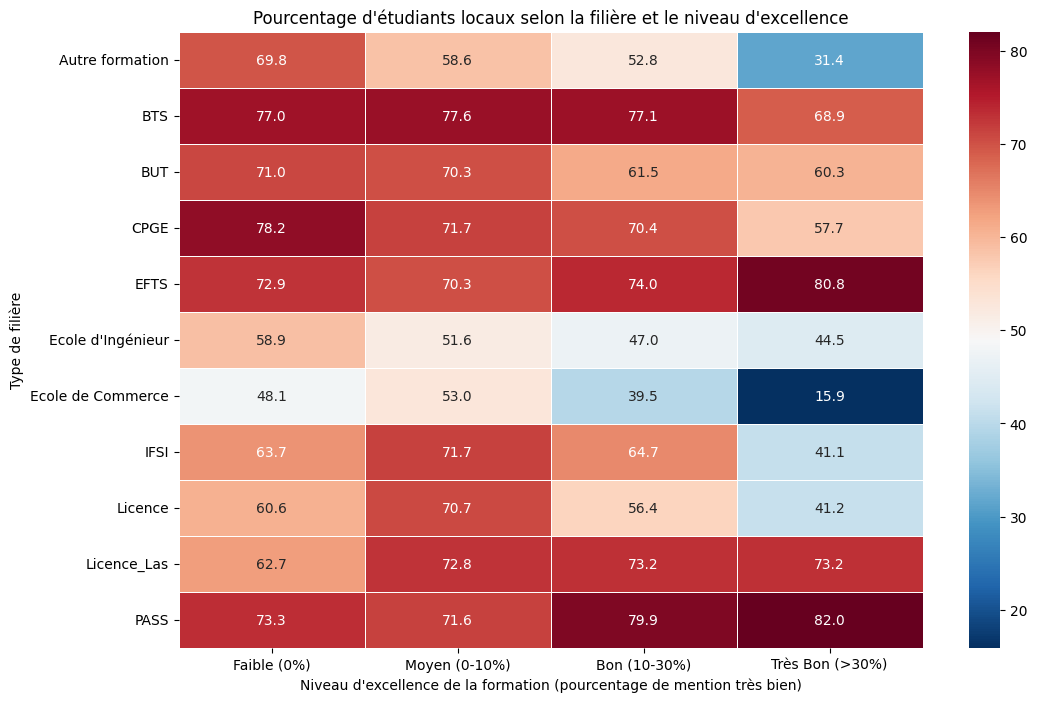

In [ ]:
pivot_excellence = df.pivot_table(
    index="filiere_agr",
    columns="niveau_formation",
    values="part_bac_ac",
    aggfunc="mean"
)

plt.figure(figsize=(12,8))

sns.heatmap(
    pivot_excellence,
    annot=True,
    fmt=".1f",
    cmap="RdBu_r",
    linewidths=.5
)

plt.title("Pourcentage d'étudiants locaux selon la filière et le niveau d'excellence")
plt.xlabel("Niveau d'excellence de la formation (pourcentage de mention très bien)")
plt.ylabel("Type de filière")

plt.show()

Cette heatmap révèle un mécanisme de ségrégation spatiale selon le niveau de la filière. 

Les couleurs sont différentes selon les formations. En effet, les BTS, EFTS ou PASS restent globalement très rouge, peu importe le niveau, contrairement à des filières comme des BUT, des CPGE, des licence ou des IFSI. Ainsi, certaines formations sont des formations plutôt de proximité tandis que d'autres recrutent plus large.

Cependant, on remarque que, la PASS, LAS et les EFTS mis à part, plus le niveau de la formation augmente, plus la couleur s'éclaircie. 

On essaie d'enquêter plus en détail le rôle de la filière dans la mobilité.

/tmp/ipykernel_3871/1972848811.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


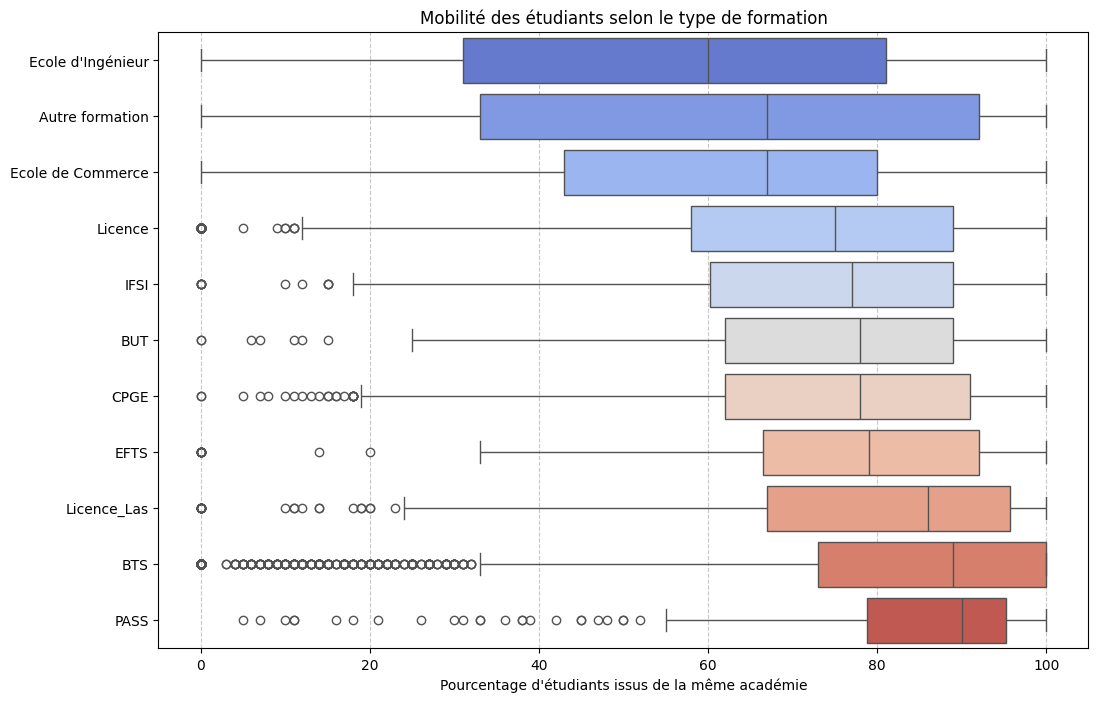

In [ ]:
# Role de la filière dans la mobilité

plt.figure(figsize=(12, 8))

# Tri des filières de la "Plus Mobile" (en haut) à la "Plus Locale" (en bas) en utilisant la médiane pour être robuste aux valeurs extrêmes
ordre_filieres = df.groupby("filiere_agr")["part_bac_ac_pcv"].median().sort_values().index

# 2. Le Boxplot
sns.boxplot(
    data=df,
    x="part_bac_ac_pcv", # Taux de locaux
    y="filiere_agr",     # Type de filière
    order=ordre_filieres,
    palette="coolwarm" # Rouge = Local, Bleu = Mobile
)

plt.title("Mobilité des étudiants selon le type de formation")
plt.xlabel("Pourcentage d'étudiants issus de la même académie")
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

On suppose qu'en France la filière en tant que telle est déjà un indicateur du niveau scolaire, ce qui peut être discuté. En effet, les meilleurs élèves suivent souvent des études longues (CPG, école d'ingénieur et de commerce) tandis que ceux qui sont plus en difficultés se dirigent vers des formations courtes, type BTS. 

Cette analyse par filière confirme une segmentation du marché de l'enseignement supérieur. On observe ainsi une corrélation entre le caractère élitiste de la formation et la mobilité des étudiants. Ainsi, les filières élitistes (écoles d'ingénieur, de commerce, CPGE) affichent un taux de recrutement local plutôt faible. A l'inverse, des filières professionnalisantes courtes, comme les BTS, recrutent majoritairement des étudiants locaux. Cela pourrait s'expliquer par le fait que le BTS peut répondre aux besoins d'un bassin d'emploi local, encourageant donc un ancrage territorial. 

Cependant, il y a des nuances importantes au sein de chaque catégorie. En effet, dans le cas des BTS, même si la norme apparaît être un ancrage local, la présence d'un nombre important de valeurs extrêmes suggère l'existence de BTS de niche ou très réputés, rares sur le territoire qui incitent donc à une grande mobilité. Il en va de même concernant les CPGE, ce qui peut illustrer une fracture entre les classes préparatoires de proximité, qui recrutent dans leur académie, et les grandes prépas (qui bénéficient souvent d'un internant, encourageant la mobilité) qui attirent de toute la France. 

Concernant les licences, la règle par défaut est souvent l'université de secteur, ce qui explique une médiane assez élevée. Mais la taille de la boîte étant assez importante pourrait laisser penser à l'existence d'un certain type de licence qui attirerait les étudiants de loin (double licences ou licences prestigieuses) et échapperaient donc à la sectorisation.

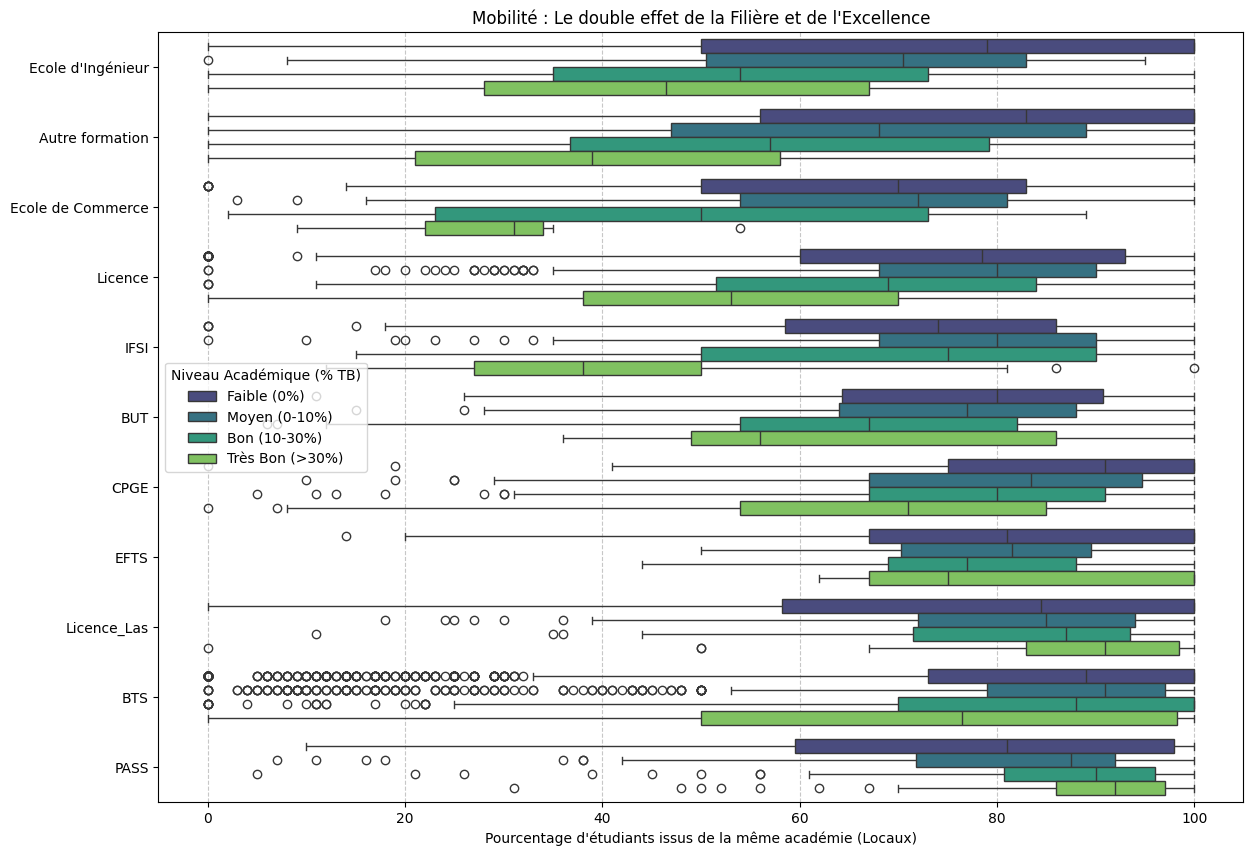

In [ ]:

plt.figure(figsize=(14, 10))

#Tri des filières
ordre_filieres = df.groupby("filiere_agr")["part_bac_ac_pcv"].median().sort_values().index

# Boxplot avec la dimension Excellence (hue)
sns.boxplot(
    data=df,
    x="part_bac_ac_pcv", 
    y="filiere_agr",     
    hue="niveau_formation", 
    order=ordre_filieres,
    palette="viridis" # Une couleur par niveau d'excellence
)

plt.title("Mobilité : Le double effet de la Filière et de l'Excellence")
plt.xlabel("Pourcentage d'étudiants issus de la même académie (Locaux)")
plt.ylabel("")
plt.legend(title="Niveau Académique (% TB)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

Ce graphique confirme notre intuition précédente. En effet, on voit, quasiment pour toutes les filières que le pourcentage d'étudiants locaux (en regardant la médiane par exemple) est plus faible dans les très bonne formations. 
Concentrons nous sur le cas des CPGE. On observe que la médiane des prépas au niveau académique le plus faible est très haute, par rapport à celle des meilleures CPGE, qui sont donc attractives à un niveau national. 
Concernant les BTS, on observe toujours un nombre important de valeurs extrêmes vers des formations qui ont une part de locaux assez faible, indiquant une réalité plus complexe que simplement un recrutement local. Ces recrutements ont l'air de non pas s'expliquer par le prestige de la formation mais peut être par la rareté de la spécialité, contraignant donc à recruter des étudiants sur l'ensemble du territoire. 

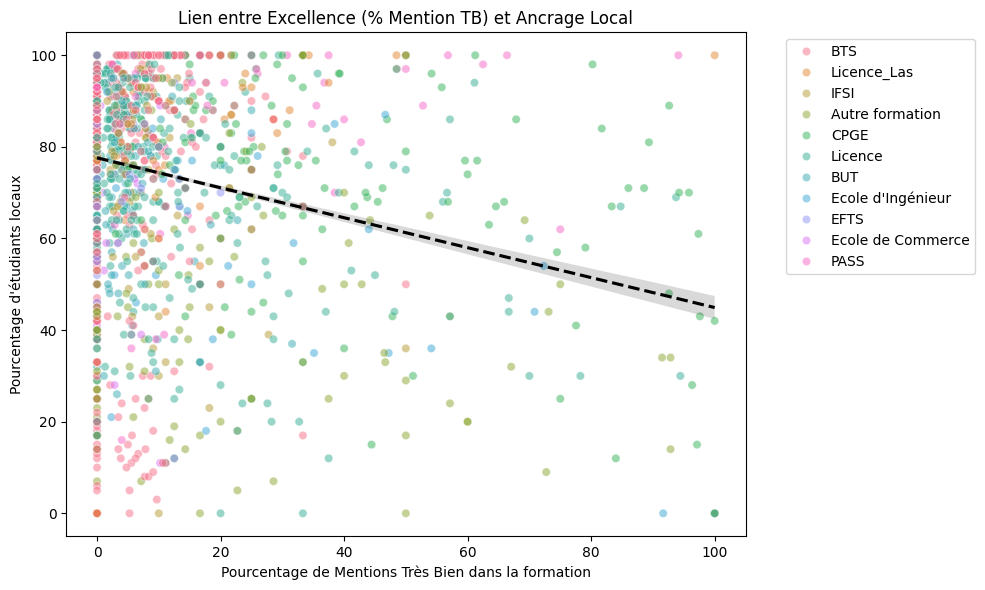

In [ ]:
# Preuve qu'il existe une corrélisation entre le niveau de la formation (nombre de mention TB) et mobilité

plt.figure(figsize=(10, 6))

# On prend un échantillon pour ne pas surcharger le graphique
sample_df = df.sample(2000, random_state=42)

sns.scatterplot(
    data=sample_df,
    x="tb_eleves",       # % de mention TB
    y="part_bac_ac_pcv", # % de locaux
    hue="filiere_agr",   # Une couleur par filière pour voir les groupes
    alpha=0.5
)

# On ajoute la courbe de tendance globale (Régression)
sns.regplot(
    data=df, 
    x="tb_eleves", 
    y="part_bac_ac_pcv", 
    scatter=False, 
    color="black", 
    line_kws={"linestyle": "--"}
)

plt.title("Lien entre Excellence (% Mention TB) et Ancrage Local")
plt.xlabel("Pourcentage de Mentions Très Bien dans la formation")
plt.ylabel("Pourcentage d'étudiants locaux")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Ici, on observe une corrélation négative entre le niveau d'excellence académique (pourcentage d'étudiants ayant eu une mention très bien) et le pourcentage d'étudiants locaux. Il tend donc à valider l'hypothèse selon laquelle la mobilité dépend du niveau scolaire. On peut effectuer deux analyses complémentaires : 
- L'excellence scolaire (avoir une mention très bien au bac) permet à l'étudiant une certaine mobilité puisqu'il peut postuler aux formations prestigieuses dans toute la France.
- De plus, les formation situées tout à droite du graphique sont sûrement des formations prestigieuses, qui cherchent donc les meilleurs profils et ne s'arrêtent donc pas à un recrutement local. 
Ainsi, on observe une dualité sur le marché de l'éducation : d'un côté les formation en haut à gauche, sûrement généralistes, qui recrutent plutôt localement et celui des formations en bas à droite, très prestigieuses qui recrutent sur l'ensemble du territoire national. 

Ainsi, si l'excellence scolaire des étudiants favorisent leur mobilité, c'est parce qu'elle leur ouvre les portes des formations les plus prestigieuses. Nous pouvons donc nous intéresser maintenant sur le rôle de la sélectivité de la formation (difficulté d'accès) sur le recrutement local ou national.

<a id="selectivite"></a> 
### La sélectivité

Alors que l'excellence académique caractérise la demande, la sélectivité est une caractéristique intrinsèque à l'offre. Les deux sont extrêmement liées puisque les meilleurs élèves cherchent les formations les plus sélectives. 

Pour mesurer cette sélectivité, nous utilisons le taux d'accès, donné directement dans la base de données. On se demande ainsi si un taux d'accès faible, signifiant que la formation est sélective, engendre un taux de mobilité plus élevé chez les étudiants suivant cette formation.

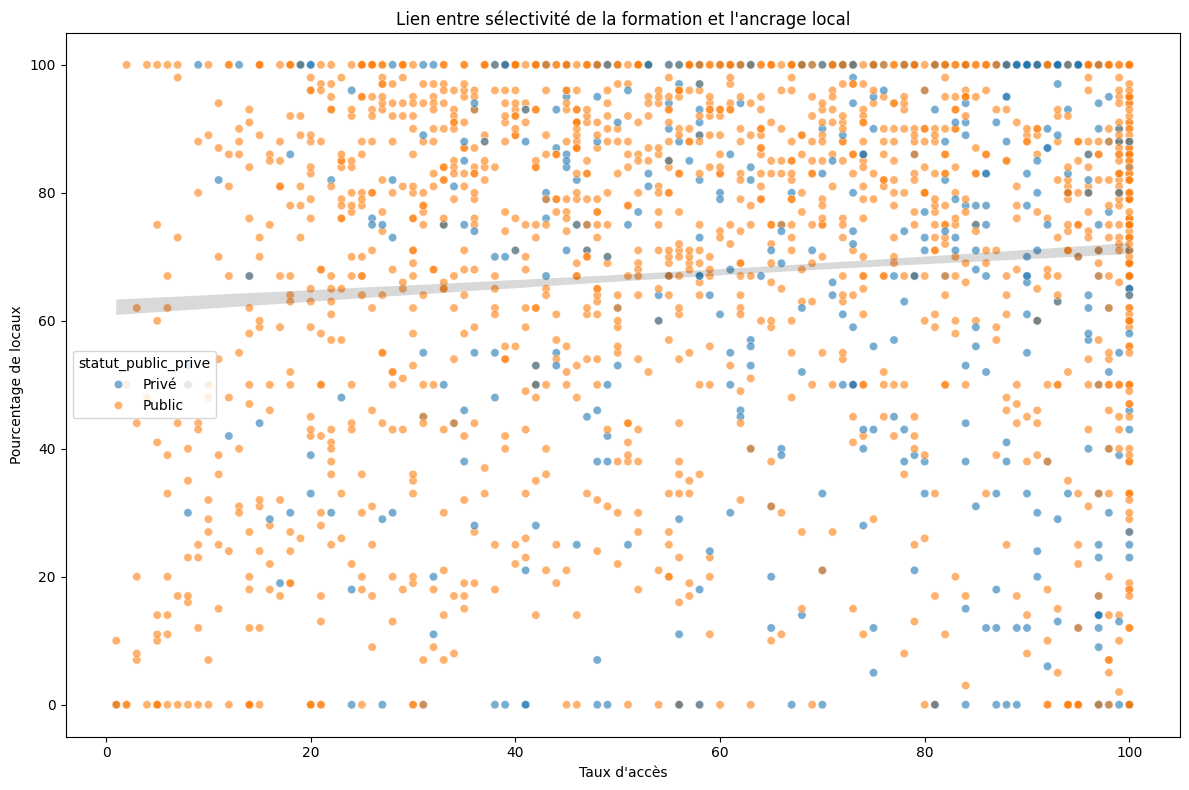

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df.sample(2000, random_state=42),
    x="taux_acces_clean",
    y="part_bac_ac",
    hue="statut_public_prive",
    alpha=0.6
)

sns.regplot(
    data=df,
    x="taux_acces_clean",
    y="part_bac_ac",
    scatter=False,
    color="black",
    line_kws={"linestyle":""}
)

plt.title("Lien entre sélectivité de la formation et l'ancrage local")
plt.xlabel("Taux d'accès")
plt.ylabel("Pourcentage de locaux")

plt.tight_layout()
plt.show()

Ici, on observe une corrélation positive entre le taux d'accès et le pourcentage de locaux. 
En effet, le côté droit du graphique (taux d'accès élevé) concentre les points situés en haut de l'axe des ordonnées, autrement dit les pourcentages importants de locaux. Ainsi, les formations recrutant quasiment tous les candidats ont un recrutement principalement local. On peut supposer que parce que cette formation n'est pas sélective, l'intérêt de la mobilité est fortement réduit car il peut obtenir la même chose en restant proche de chez lui, sans payer le coût de la mobilité. 
A l'opposé, on a du côté gauche du graphique des points avec un pourcentage de locaux plus faible. On peut supposer que la sélectivité transforme la formation en un bien rare dont l'intérêt contrebalance le coût de la mobilité. 

<a id="public_prive"></a> 
### Le clivage public/privé 

On peut également se demander si le statut de l'établissement joue un rôle dans son ouverture géographique.

In [61]:
print("Ancrage local (pourcentage de locaux) selon le statut de la formation")
stats_mob_statut = decrire_donnees(df, "statut_public_prive", "part_bac_ac_pcv")
display(stats_mob_statut)

Ancrage local (pourcentage de locaux) selon le statut de la formation


,nombre,Q1,médiane,Q3,moyenne
statut_public_prive,,,,,
Privé,3041,50.0,78.0,94.0,68.8
Public,11038,62.0,82.0,94.0,74.3


Ce tableau nous montre que le système français est majoritairement public, ce qui contraint la mobilité puisque de nombreuses formations sont soumises à des politiques de sectorisation. De plus, cette importance du public montre un maillage territorial des formations important. 

On remarque également que le privé est un peu plus mobile que le public avec une médiane à 78% contre 82% d'étudiants locaux pour le public, appuyant l'hypothèse d'un effet de la sectorisation. Cependant la dispersion est beaucoup plus importante dans le privé.

/tmp/ipykernel_3871/2115162710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


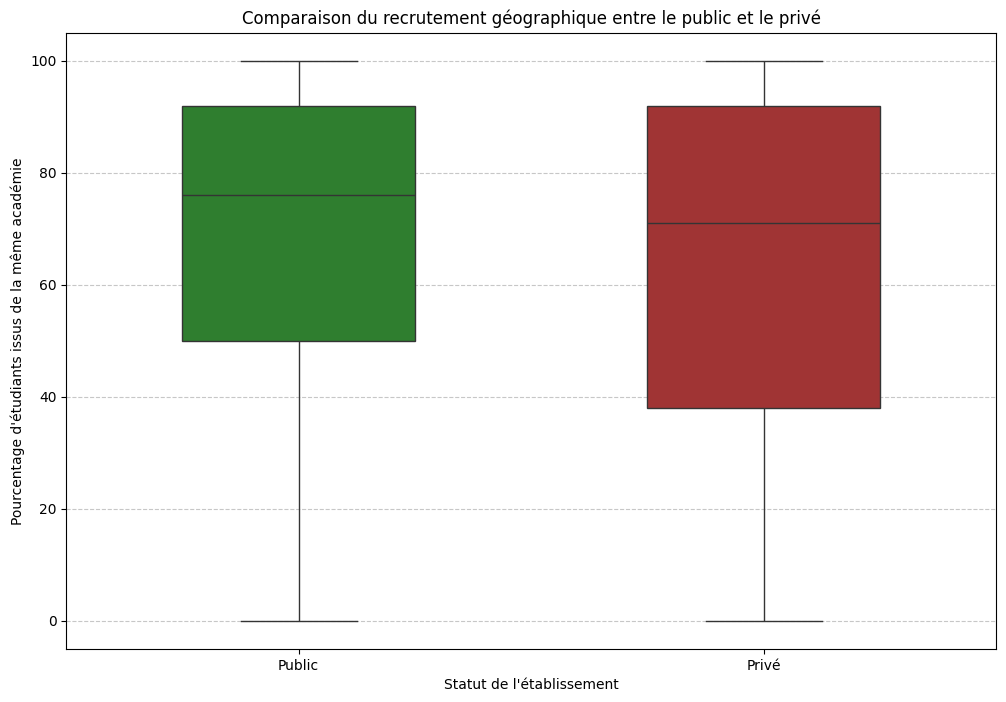

In [ ]:
#On ne garde que le public et le privé
statut_filtre = df[df["statut_public_prive"].isin(["Public", "Privé"])]

plt.figure(figsize=(12,8))

sns.boxplot(
    data=statut_filtre,
    x="statut_public_prive",
    y="part_bac_ac",
    palette=["forestgreen","firebrick"],
    width=0.5
)

plt.title("Comparaison du recrutement géographique entre le public et le privé")
plt.xlabel("Statut de l'établissement"),
plt.ylabel("Pourcentage d'étudiants issus de la même académie")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Ce graphique met en évidence un clivage entre le public et le privé. En effet, les formations privées ont des taux de mobilité plus important, la médiane est plus basse. Cela peut s'expliquer par des logiques propres à chacun de ces statuts. En effet, les établissements publics ont une mission de service public avec pour objectif principal est d'offrir une formation accessible sur l'ensemble du territoire, favorisant mécaniquement un recrutement plus local. Au contraire, les établissement privés recrutent sur un rayon plus large, avec une logique de marché. D'un point de vue psychologique et économique, le fait de payer pour la formation pousse à accepter de payer pour la mobilité (logement). De plus, de nombreuses écoles privées, notamment les écoles d'ingénieur et de commerce déploient de grands efforts de communication pour capter les meilleurs profils, contrairement aux formations publiques, souvent plus discrètes. 
Néanmoins, on note une grande dispersion dans les formations privées, qui pourrait s'expliquer d'abord par le nombre plus réduit de formations privées par rapport aux formations publics, mais aussi par l'existence de petites formations privées qui fonctionnent plutôt localement comme un vecteur de seconde chance par exemple. 

In [62]:
print("Taux d'accès (sélectivité) selon le statut de la formation")
stats_sel_statut = decrire_donnees(df, "statut_public_prive", "taux_acces_clean")
display(stats_sel_statut)

Taux d'accès (sélectivité) selon le statut de la formation


,nombre,Q1,médiane,Q3,moyenne
statut_public_prive,,,,,
Public,10980,34.0,56.5,85.0,57.9
Privé,3008,50.0,73.0,90.0,68.2


/tmp/ipykernel_3871/1047538896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


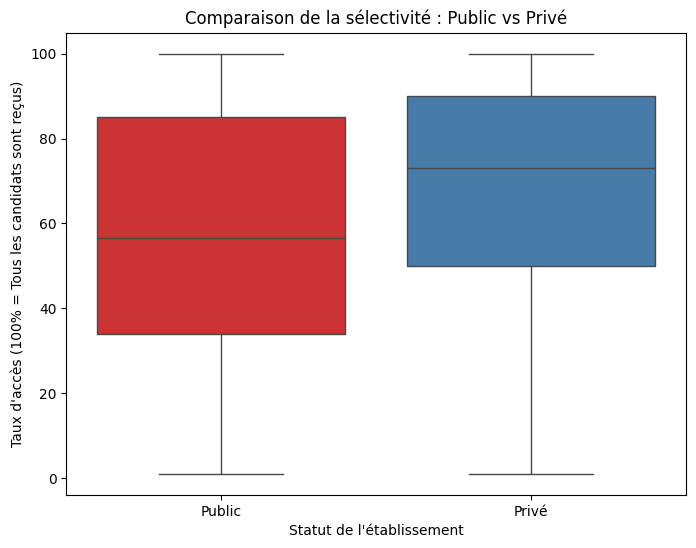

In [64]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x="statut_public_prive",
    y="taux_acces_clean",
    palette="Set1" 
)

plt.title("Comparaison de la sélectivité : Public vs Privé")
plt.xlabel("Statut de l'établissement")
plt.ylabel("Taux d'accès (100% = Tous les candidats sont reçus)")
plt.show()

On observe ici que la sélectivité statistique des formations est plus forte dans le public que dans le privé. 
Avec un taux d'accès médian de 56,5%, le service public concentre la tension. En effet, la qualité et la gratuité de la formation attirent un nombre important de candidats pour un nombre de places limité entraînant une saturation des formations.
Au contraire, le privé affiche une médiane plus haute et une dispersion moins importante, ce qui suggère que le prix agit comme un filtre, les incitant à rechercher plus activement des candidats. 

Ainsi, un étudiant refusé dans une filière publique locale, à cause de la tension de la demande, pourra se tourner vers son équivalent privé, plus facilement accessible même si cela engendre potentiellement une mobilité pour l'étudiant. 

<a id="genre"></a> 
### L'influence du genre

L'analyse de l'influence du genre sur la mobilité s'appuie sur deux mécanismes : 
- Une différence dans la réussite scolaire : les filles obtiennent de meilleurs résultats au bac et au lycée que les garçons. Or, comme nous l'avons vu, l'excellence scolaire semble être un vecteur de mobilité. Ainsi, on pourrait s'attendre à une mobilité accrue dans les formations plutôt féminines.
- Une ségrégation des filières : les choix d'orientation sont encore très genrés. Les garçons se dirigent plutôt vers des filières scientifiques ou techniques et industrielles, ces dernières étant souvent courtes et locales (BTS), tandis que les filles se dirigent plutôt vers des formations de soin, langue ou sciences humaines dont le maillage territorial est différent => *ce serait cool d'avoir une carte qui montre ça ! => soit une carte avec une classification des types de formation : technique, scientifique, soin, langue... soit une carte avec les formations à dominante féminine et masculine et idéalement les deux !*. 

On cherche donc à savoir si ces dynamiques se traduisent par une différence dans l'ancrage territorial des formations à dominante féminine et masculine. 

A noter : nous avons calculé une variable "part_filles" pour indiquer la dominante de genre dans chaque formation. Ainsi, une formation à dominante masculine sera constituée de moins de 40% de filles et une formation à dominante féminine sera constituée de plus de 60% de filles. 

In [66]:
print("Répartiton des formations par genre")

repartition_genre = df["categorie_genre"].value_counts().to_frame("Nombre d'établissements")
display(repartition_genre)

Répartiton des formations par genre


,Nombre d'établissements
categorie_genre,
Dominante féminine,5960
Dominante masculine,5225
Mixte,2894


Le paysage de l'enseignement supérieur apparaît polarisé par des formations à dominante féminine d'un côté et des formations à dominante masculine de l'autre, la mixité semblant être une exception. 

*On peut regarder plus en détails quels filières sont considérées comme féminines et lesquelles sont considérées comme masculines.*

/tmp/ipykernel_3871/610834050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


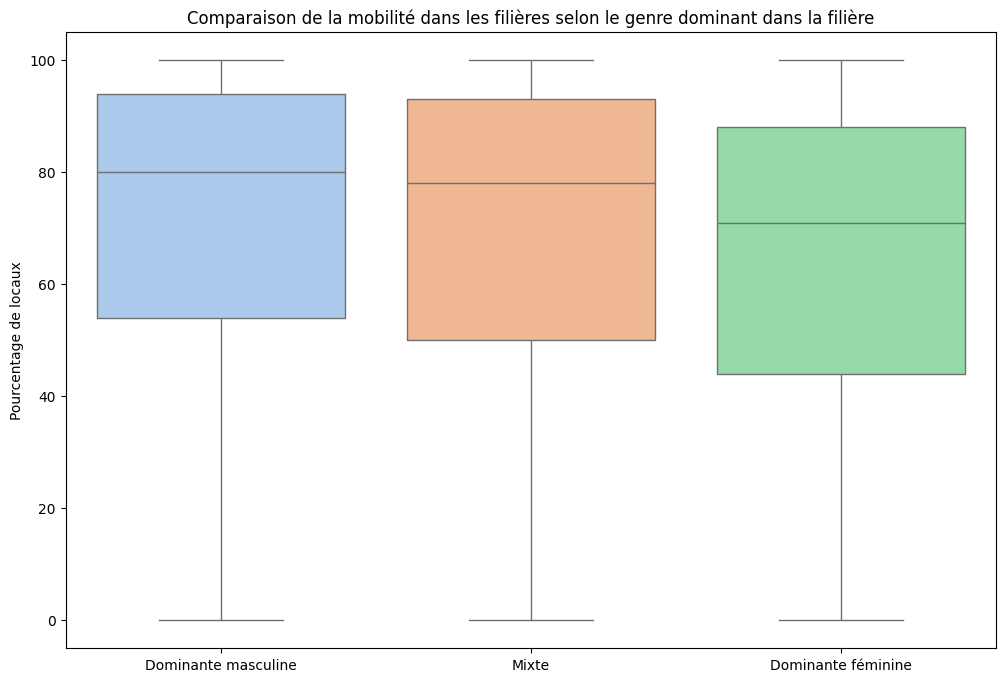

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(
    data=df,
    x="categorie_genre",
    y="part_bac_ac",
    palette="pastel",
)

plt.title("Comparaison de la mobilité dans les filières selon le genre dominant dans la filière")
plt.xlabel("")
plt.ylabel("Pourcentage de locaux")

plt.show()


Ce graphique montre une différence dans l'ancrage territorial selon le genre dominant dans la formation. En effet, les filières à dominante masculine ont un ancrage territorial plus marqué avec une médiane de 80% d'étudiant issus de la même académie. Les filières à dominante féminine sont, quant à elle, plus mobiles avec une médiane qui s'approche des 70% de locaux. Et les filières mixtes se situent dans une position intermédiaire. Cet écart de quasiment dix points entre les médianes est assez significatif et peut être analysé comme une différence structurelle dans le recrutement des formations à dominante masculine et celles à dominante féminine. 
Cet ancrage local plus important pour les formations à dominante masculine peut s'expliquer par la nature des formations, les BTS industriels et technologiques sont majoritairement masculins et bénéficient d'un maillage territorial très fin. En effet, en étant présent dans de nombreux lycées, ils permettent aux garçons de se former proche de chez eux. A l'inverse, les filières plutôt féminines (lettres, sciences humaines, santé...) sont des filières plutôt universitaires et donc concentrées dans des pôles universitaires régionaux qui imposent une mobilité au sein de l'académie mais également à l'extérieur de l'académie. 
A cela, nous pouvons ajouter le fait que les résultats scolaires des filles sont globalement meilleurs au lycée, leur facilitant l'accès à des formations plus sélectives qui imposent une mobilité. 
Cependant la dispersion légèrement plus importante de la boxplot concernant les formations à dominante féminine suggère une diversité des situations. 

In [67]:
print("Féminisation par filière (pourcentage de filles admises)")
stats_genre = decrire_donnees(df, "filiere_agr", "part_filles")
display(stats_genre)

Féminisation par filière (pourcentage de filles admises)


,nombre,Q1,médiane,Q3,moyenne
filiere_agr,,,,,
Ecole d'Ingénieur,523,0.0,18.0,34.0,23.6
CPGE,982,24.0,39.0,61.0,42.1
BUT,819,12.0,39.0,62.0,39.6
BTS,5345,12.0,44.0,66.0,41.5
Ecole de Commerce,222,38.0,44.0,55.0,46.4
Autre formation,1605,22.0,51.0,75.0,49.0
Licence,3019,47.0,68.0,79.0,62.5
Licence_Las,522,55.0,70.0,80.0,67.4
PASS,284,60.0,70.0,79.0,68.8


/tmp/ipykernel_3871/1314919503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='part_filles', ylabel='filiere_agr'>

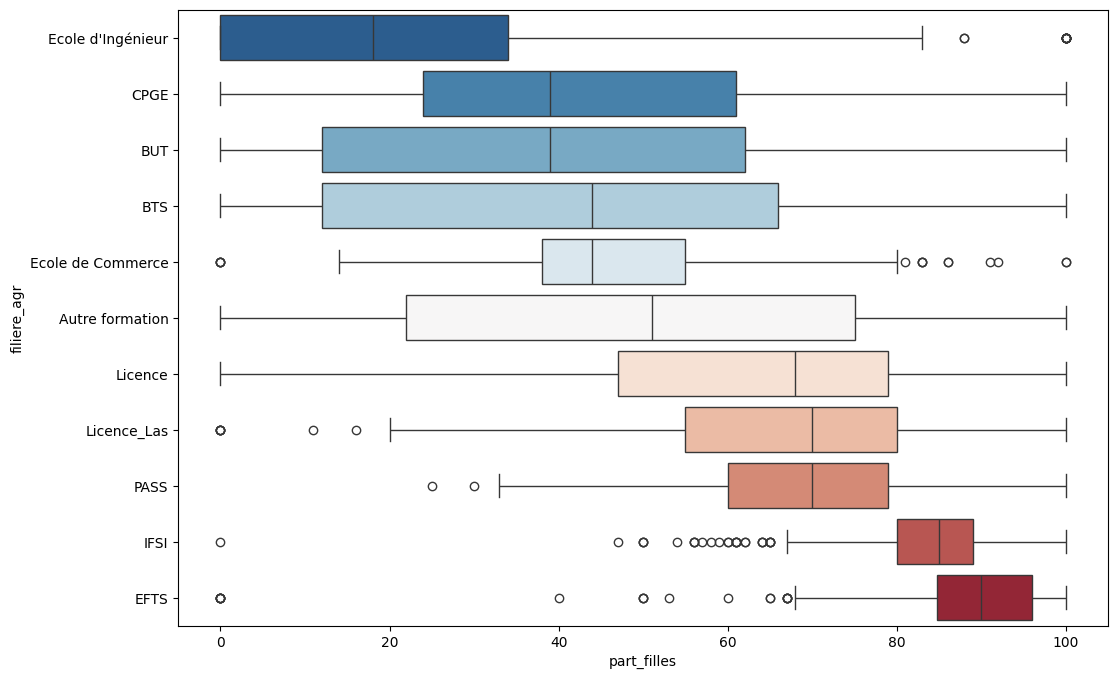

In [ ]:
plt.figure(figsize=(12,8))
ordre = df.groupby("filiere_agr")["part_filles"].median().sort_values().index

sns.boxplot(
    data=df,
    x="part_filles",
    y="filiere_agr",
    order=ordre,
    palette="RdBu_r"
)

#En rouge les filles et en bleu les garçons

In [ ]:
plt.figure(figsize=(10, 8))

# 1. Calcul de l'ordre (du plus masculin au plus féminin)
ordre = df.groupby("filiere_agr")["part_filles"].median().sort_values().index

# 2. Création du Boxplot
sns.boxplot(
    data=df,
    x="part_filles",
    y="filiere_agr",
    order=ordre,
    palette="RdBu_r" # Rouge (Filles) vers Bleu (Garçons)
)

# 3. Ajout de la ligne de parité
plt.axvline(x=50, color='black', linestyle='--', linewidth=1, label="Parité (50%)")

plt.title("Ségrégation horizontale : La part des femmes par filière")
plt.xlabel("Pourcentage de filles dans la formation")
plt.ylabel("")
plt.legend()
plt.show()

Ce graphique et ce tableau permettent de confirmer l'analyse précédente *peut-être mieux de le mettre avant*.
On observe que des formations scientifiques, type ingénieur, sont très peu féminisées. Au contraire, les formations du care sont quasi exclusivement féminines, notamment les EFTS (travailleurs socials) avec une médiane de 90% et les IFSI (infirmiers) avec une médiane de 85%. 
Les BTS ont une médiane de 41%, assez proche de la mixité. Cependant l'écart interquartile est très important, suggérant une ségrégation interne importante. Il apparaît y avoir d'un côté des BTS techniques, très masculins et de l'autre des BTS de service, plutôt féminins.  

<a id="modelisation"></a> 
## Modélisation

On cherche ce qui favorise la mobilité. Pour cela, nous commençons par effectuer des régressions linéaires pour expliquer le taux de mobilité.

On ne montre pour l'instant que des corrélations et non des causalités.